<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [6]:
# !wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv


### Step 2: Import necessary libraries and load the dataset


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [10]:
df = pd.read_csv("survey_data_clean.csv")

### Display the first few rows of the data to understand its structure


In [13]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Unknown,Unknown,86155.287263,Unknown
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.000000,Unknown,Unknown,86155.287263,Unknown
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Appropriate in length,Easy,86155.287263,Unknown
3,4,I am learning to code,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too long,Easy,86155.287263,Unknown
4,5,I am a developer by profession,18-24 years old,"Student, full-time","Hybrid (some remote, some in-person)",Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,86155.287263,Too short,Easy,86155.287263,Unknown


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



In [17]:
df['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [19]:
df['JobSatPoints_6'].value_counts()

JobSatPoints_6
0.00     7912
20.00    4352
10.00    3328
30.00    2482
15.00    1466
         ... 
73.00       1
6.25        1
57.00       1
61.00       1
63.00       1
Name: count, Length: 93, dtype: int64

In [20]:
df['JobSatPoints_7'].value_counts()

JobSatPoints_7
0.0     8119
20.0    4233
10.0    3934
30.0    2080
15.0    1601
        ... 
81.0       1
73.0       1
94.0       1
61.0       1
36.0       1
Name: count, Length: 91, dtype: int64

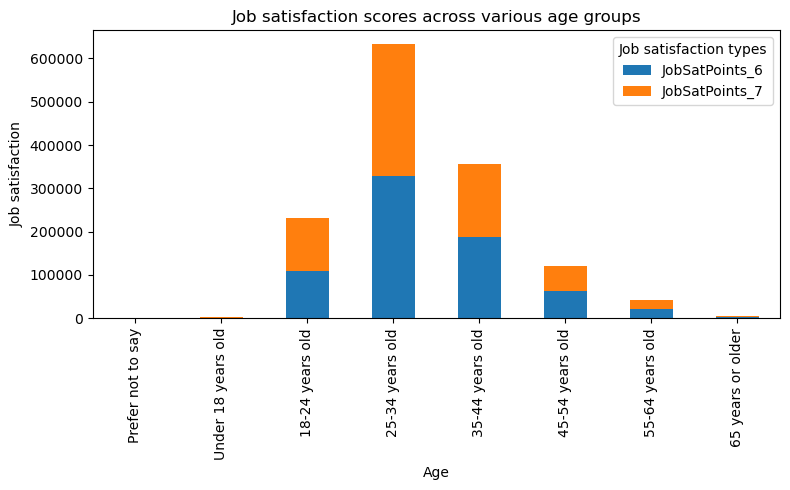

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


df_clean = df.dropna(subset=['Age','JobSatPoints_6','JobSatPoints_7'])

df_groupped = df_clean[['Age','JobSatPoints_6','JobSatPoints_7']].groupby('Age').sum()


# Custom order
age_order = [
    'Prefer not to say',
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]

df_groupped = df_groupped.loc[age_order]
# df_groupped 
# Plot as stacked bar chart
df_groupped.plot(kind='bar', stacked=True, figsize=(8, 5))

# Formatting
plt.title('Job satisfaction scores across various age groups')
plt.xlabel('Age')
plt.ylabel('Job satisfaction')
plt.legend(title='Job satisfaction types')
plt.tight_layout()
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


In [44]:
df['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                  39041
Independent contractor, freelancer, or self-employed                                                                                                  4846
Student, full-time                                                                                                                                    4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3557
Not employed, but looking for work                                                                                                                    2341
                                                                                                                                                     ...  
Employed, full-time;Student, full-time;Independent contract

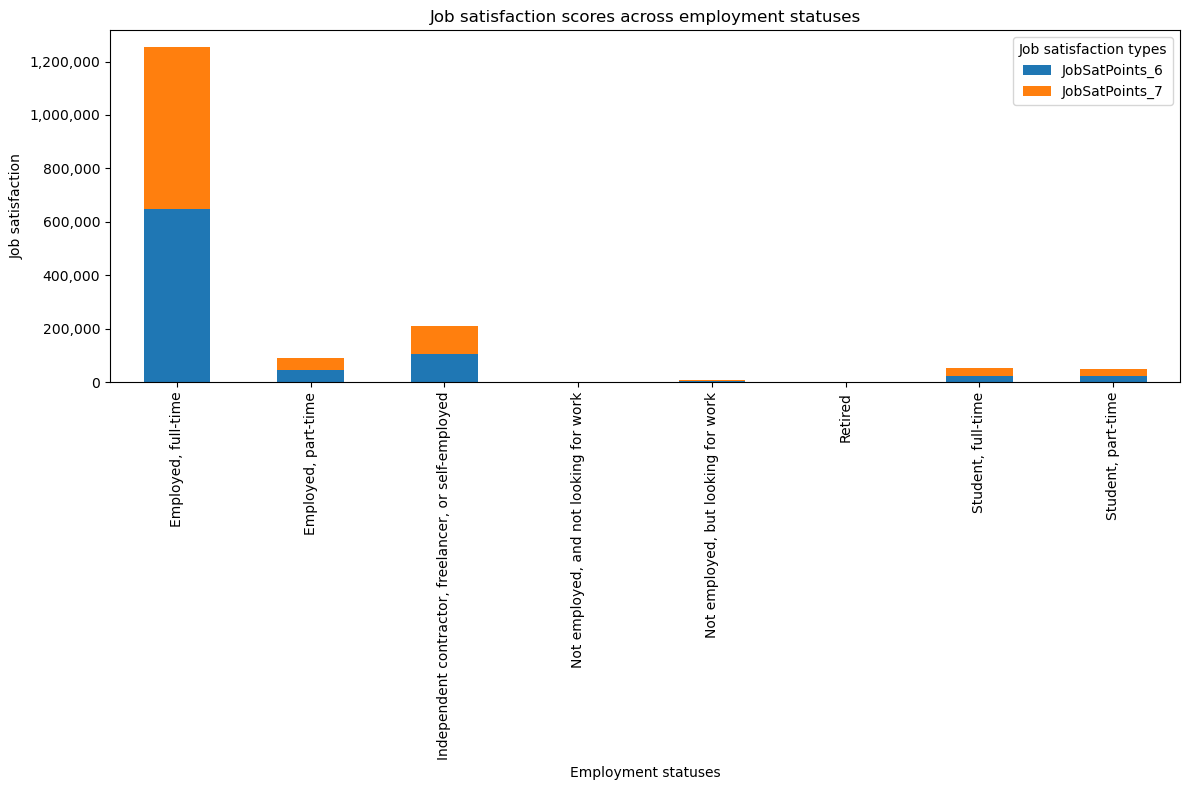

In [38]:
df_clean = df.dropna(subset=['Employment','JobSatPoints_6','JobSatPoints_7']).copy()

# Convert semicolon-separated strings to lists
df_clean['Employment_clean'] = df_clean['Employment'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Employment_clean').reset_index(drop=True)

# Strip whitespace
df_clean['Employment_clean'] = df_clean['Employment_clean'].str.strip()

df_groupped = df_clean[['Employment_clean','JobSatPoints_6','JobSatPoints_7']].groupby('Employment_clean').sum()


# Plot as stacked bar chart
df_groupped.plot(kind='bar', stacked=True, figsize=(12, 8))
df_groupped

import matplotlib.ticker as ticker 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


# Formatting
plt.title('Job satisfaction scores across employment statuses')
plt.xlabel('Employment statuses')
plt.ylabel('Job satisfaction')
plt.legend(title='Job satisfaction types')
plt.tight_layout()
plt.show()



### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


C:\Users\serge\AppData\Local\Temp\ipykernel_10984\1234100176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['ConvertedCompK'] = df_clean['ConvertedCompYearly'] / 1000
C:\Users\serge\AppData\Local\Temp\ipykernel_10984\1234100176.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AgeNumeric'] = df_clean['Age'].map(age_map)


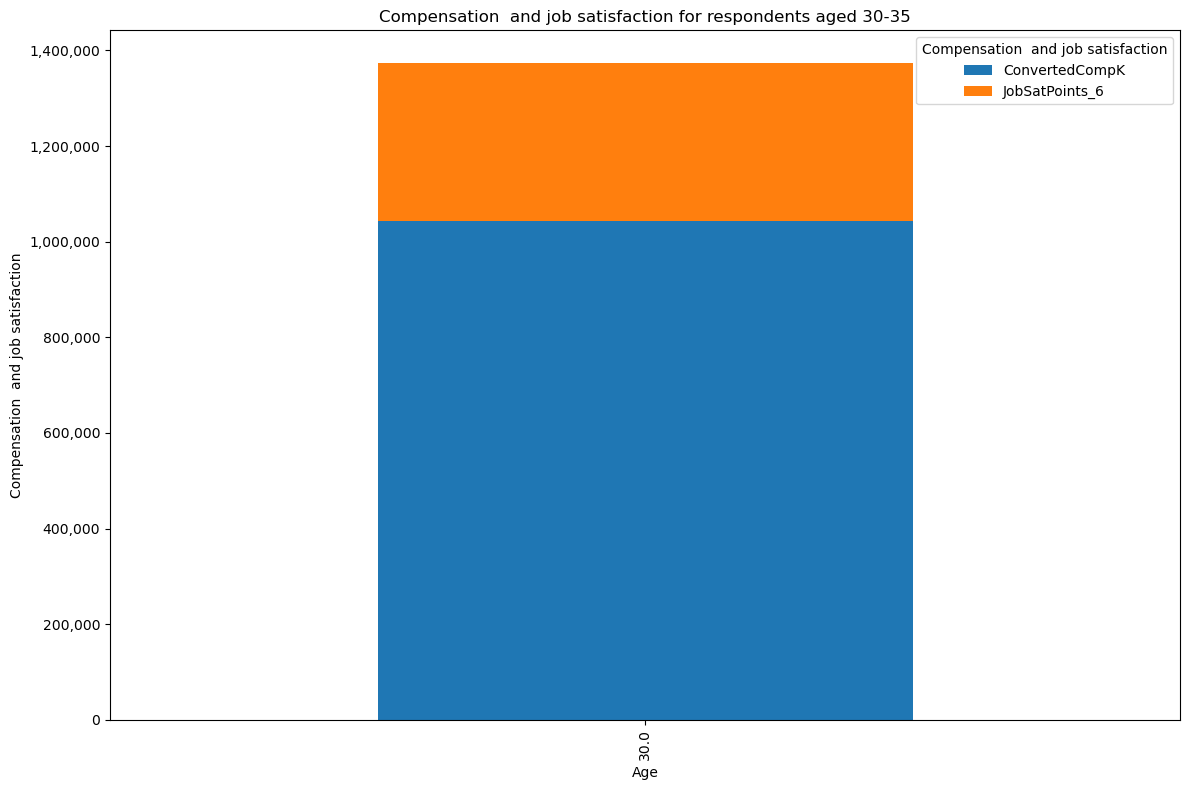

In [58]:





df_clean = df.dropna(subset=['Age','ConvertedCompYearly','JobSatPoints_6'])

# Optional: scale compensation down (e.g., to thousands) for plotting
df_clean['ConvertedCompK'] = df_clean['ConvertedCompYearly'] / 1000

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df_clean['AgeNumeric'] = df_clean['Age'].map(age_map)


df_30_35  = df_clean[(df_clean['AgeNumeric'] >= 30) & (df_clean['AgeNumeric'] <= 35)]

# # Filter for only 18-24 years old
# df_25_34 = df_clean[df_clean['Age'] == '25-34 years old']



# Then aggregate (e.g., sum or mean)
# result = df_25_34[['JobSatPoints_6', 'JobSatPoints_7']].sum()
df_groupped = df_30_35[['AgeNumeric','ConvertedCompK','JobSatPoints_6']].groupby('AgeNumeric').sum()


# Plot as stacked bar chart
df_groupped.plot(kind='bar', stacked=True, figsize=(12, 8))


import matplotlib.ticker as ticker 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))


# Formatting
plt.title('Compensation  and job satisfaction for respondents aged 30-35')
plt.xlabel('Age')
plt.ylabel('Compensation  and job satisfaction')
plt.legend(title='Compensation  and job satisfaction')
plt.tight_layout()
plt.show()



C:\Users\serge\AppData\Local\Temp\ipykernel_10196\3186160391.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CompRange'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=bins, labels=labels)
C:\Users\serge\AppData\Local\Temp\ipykernel_10196\3186160391.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['JobsatRange'] = pd.cut(df_filtered['JobSatPoints_6'], bins=bins2, labels=labels2)
C:\Users\serge\AppData\Local\Temp\ipykernel_10196\3186160391.py:32: FutureWarning: The defaul

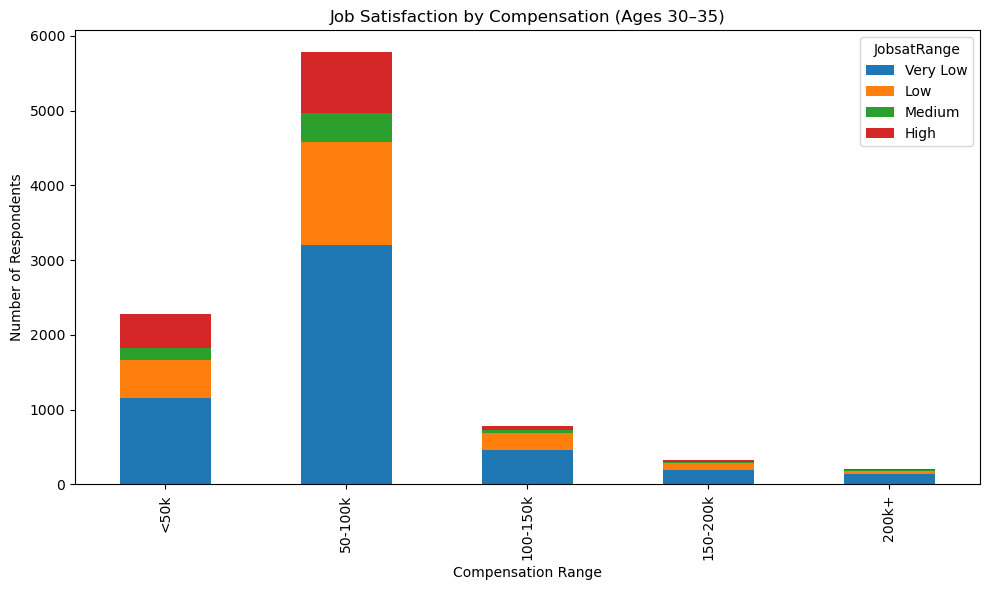

In [68]:

# Same task 2 with  compensation and job satisfaction values devided in bins : 


# Filter 30–35
import matplotlib.pyplot as plt
import seaborn as sns

age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70,
}
df['AgeNumeric'] = df['Age'].map(age_map)


df_filtered = df[(df['AgeNumeric'] >= 30) & (df['AgeNumeric'] <= 35)]

# Create bins for compensation
bins = [0, 50000, 100000, 150000, 200000, df_filtered['ConvertedCompYearly'].max()]
labels = ['<50k', '50-100k', '100-150k', '150-200k', '200k+']
df_filtered['CompRange'] = pd.cut(df_filtered['ConvertedCompYearly'], bins=bins, labels=labels)

# Create bins for Job Satisfaction
bins2 = [0, 25, 50, 75, 100]
labels2 = ['Very Low', 'Low', 'Medium', 'High']

# Assign satisfaction range
df_filtered['JobsatRange'] = pd.cut(df_filtered['JobSatPoints_6'], bins=bins2, labels=labels2)

# Group by CompRange and JobSatPoints_6 and count
stack_data = df_filtered.groupby(['CompRange', 'JobsatRange']).size().unstack(fill_value=0)

# Plot stacked bar
stack_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Job Satisfaction by Compensation (Ages 30–35)")
plt.xlabel("Compensation Range")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


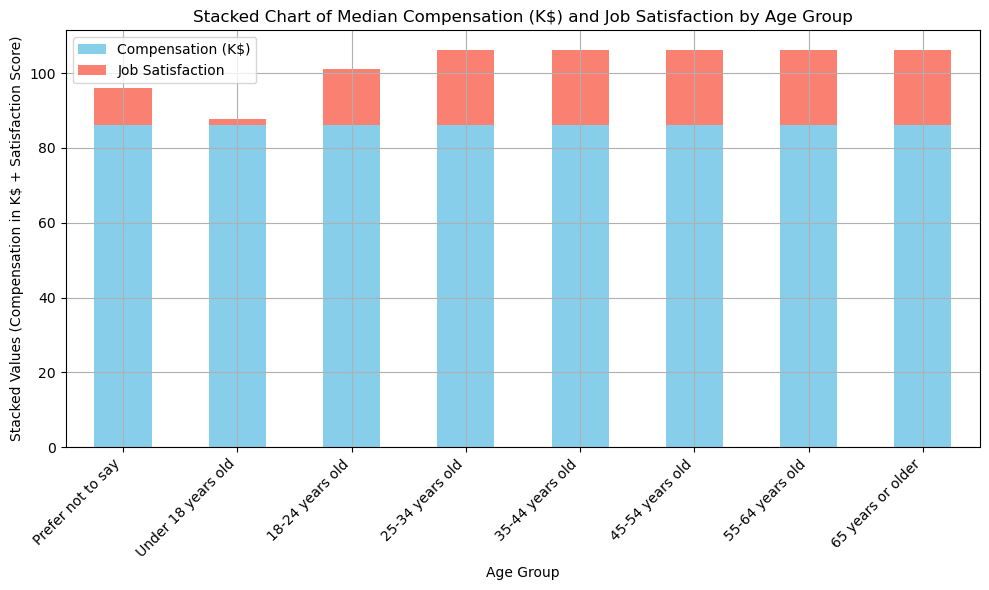

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Age', 'ConvertedCompYearly', 'JobSatPoints_6'])

# Group by age and calculate median compensation and satisfaction
grouped = df_clean.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).reset_index()



# Optional: scale compensation down (e.g., to thousands) for plotting
grouped['ConvertedCompK'] = grouped['ConvertedCompYearly'] / 1000


# Sort age categories manually for correct order
age_order = [
    'Prefer not to say',
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
grouped['Age'] = pd.Categorical(grouped['Age'], categories=age_order, ordered=True)
grouped = grouped.sort_values('Age')

# Set index for plotting
grouped.set_index('Age', inplace=True)
grouped.head()
# Plot stacked bar chart
grouped[['ConvertedCompK', 'JobSatPoints_6']].plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['skyblue', 'salmon']
)

# Formatting
plt.title('Stacked Chart of Median Compensation (K$) and Job Satisfaction by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Stacked Values (Compensation in K$ + Satisfaction Score)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(['Compensation (K$)', 'Job Satisfaction'])
plt.grid(True)
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


C:\Users\serge\AppData\Local\Temp\ipykernel_10196\358073134.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_top.groupby(['Age', 'DB_clean']).size().unstack(fill_value=0)


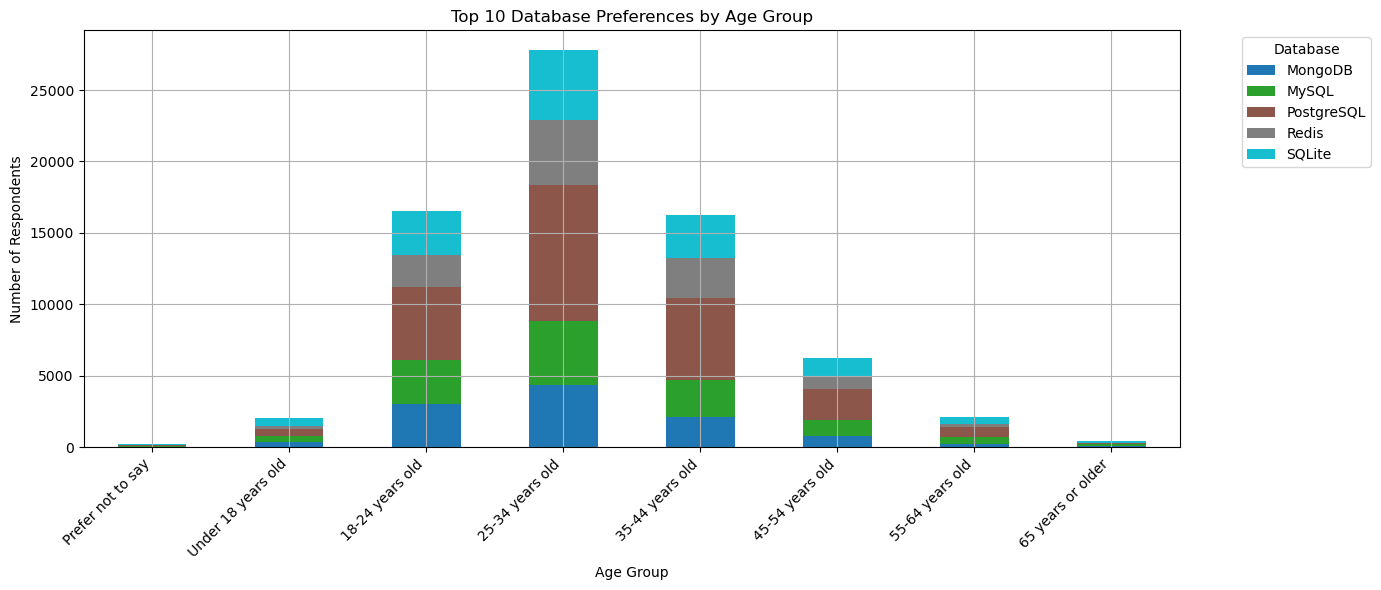

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Age', 'DatabaseWantToWorkWith']).copy()

# Convert semicolon-separated strings to lists
df_clean['DB_clean'] = df_clean['DatabaseWantToWorkWith'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('DB_clean').reset_index(drop=True)

# Strip whitespace
df_clean['DB_clean'] = df_clean['DB_clean'].str.strip()

# Define custom order for age
age_order = [
    'Prefer not to say',
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Step 1: Get top 10 most frequent databases
top_10_dbs = df_clean['DB_clean'].value_counts().nlargest(5).index

# Step 2: Filter to include only those top 10
df_top = df_clean[df_clean['DB_clean'].isin(top_10_dbs)]


# Step 3: Group by Age and DB, count, unstack for plotting
grouped = df_top.groupby(['Age', 'DB_clean']).size().unstack(fill_value=0)
grouped = grouped.sort_index()

# Plot
grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab10'
)

plt.title('Top 10 Database Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


In [126]:
# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6']).copy()

# Convert semicolon-separated strings to lists
df_clean['Empl_clean'] = df_clean['Employment'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Empl_clean').reset_index(drop=True)

# Strip whitespace
df_clean['Empl_clean'] = df_clean['Empl_clean'].str.strip()


C:\Users\serge\AppData\Local\Temp\ipykernel_10196\3148239907.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stack_data = df_clean.groupby(['Empl_clean', 'JobsatRange']).size().unstack(fill_value=0)


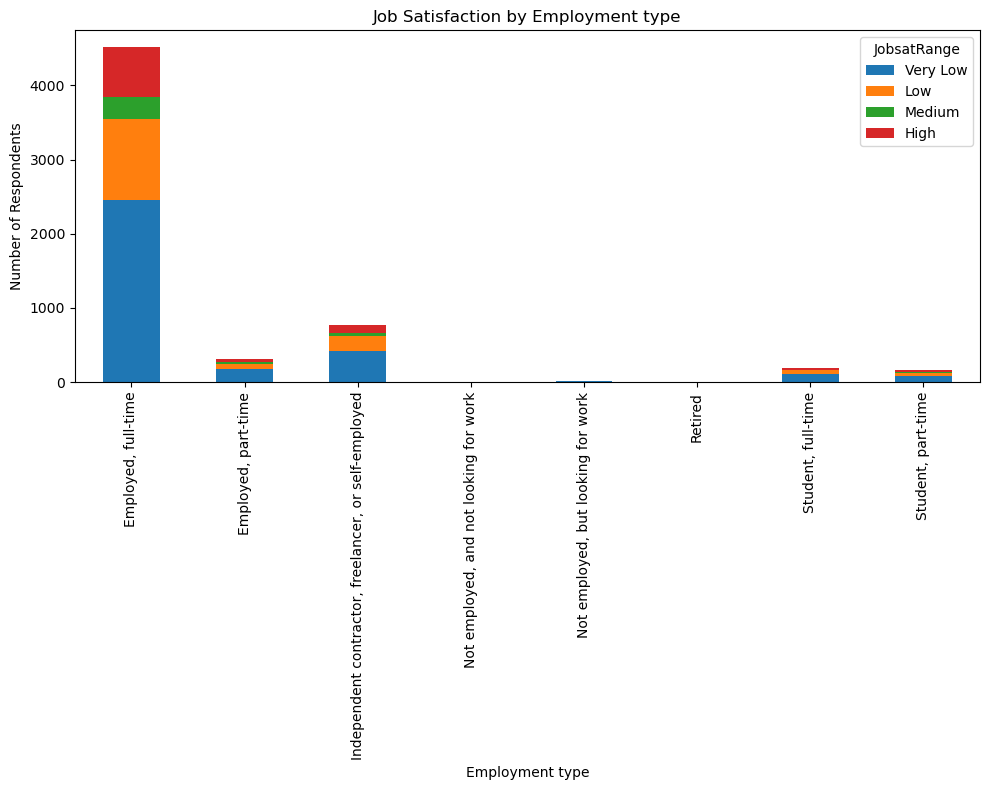

In [135]:
# Filter 30–35
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Employment', 'JobSatPoints_6']).copy()

# Convert semicolon-separated strings to lists
df_clean['Empl_clean'] = df_clean['Employment'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Empl_clean').reset_index(drop=True)

# Strip whitespace
df_clean['Empl_clean'] = df_clean['Empl_clean'].str.strip()


# Create bins for Job Satisfaction
bins2 = [0, 25, 50, 75, 100]
labels2 = ['Very Low', 'Low', 'Medium', 'High']

# Assign satisfaction range
df_clean['JobsatRange'] = pd.cut(df_filtered['JobSatPoints_6'], bins=bins2, labels=labels2)

# Group by CompRange and JobSatPoints_6 and count
stack_data = df_clean.groupby(['Empl_clean', 'JobsatRange']).size().unstack(fill_value=0)

# Plot stacked bar
stack_data.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title("Job Satisfaction by Employment type")
plt.xlabel("Employment type")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


C:\Users\serge\AppData\Local\Temp\ipykernel_10196\3788344647.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_top.groupby(['Age', 'Lang_clean']).size().unstack(fill_value=0)


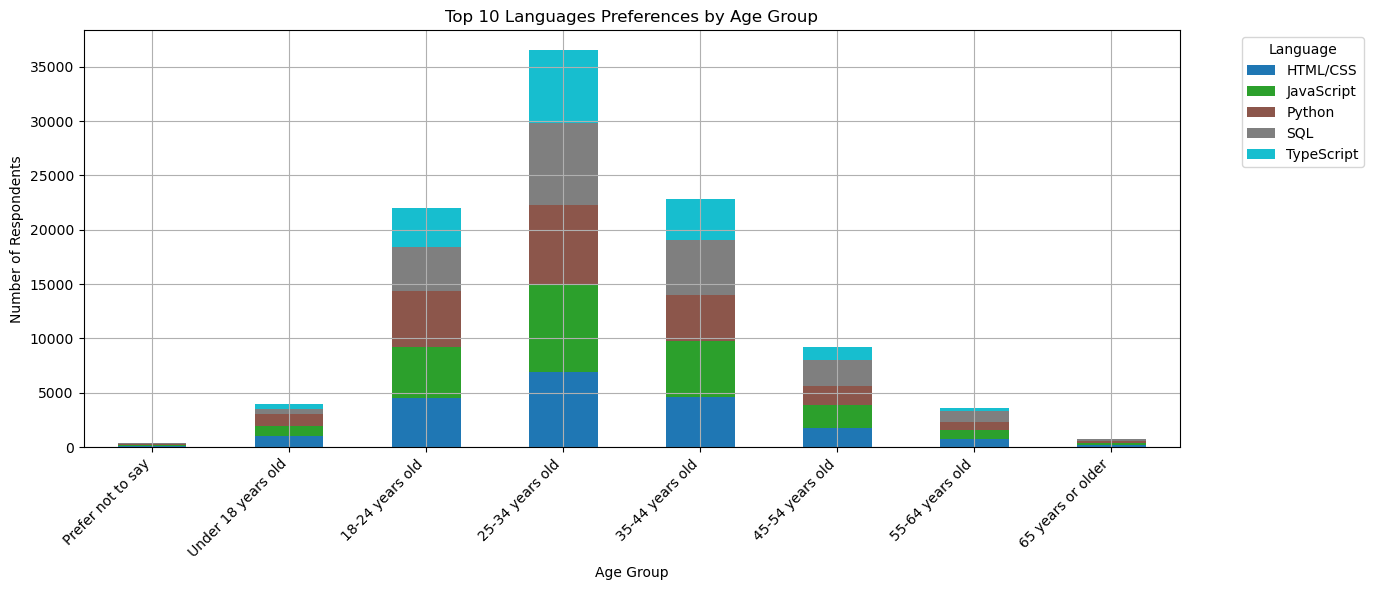

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Age', 'LanguageAdmired']).copy()

# Convert semicolon-separated strings to lists
df_clean['Lang_clean'] = df_clean['LanguageAdmired'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Lang_clean').reset_index(drop=True)

# Strip whitespace
df_clean['Lang_clean'] = df_clean['Lang_clean'].str.strip()

# Define custom order for age
age_order = [
    'Prefer not to say',
    'Under 18 years old',
    '18-24 years old',
    '25-34 years old',
    '35-44 years old',
    '45-54 years old',
    '55-64 years old',
    '65 years or older'
]
df_clean['Age'] = pd.Categorical(df_clean['Age'], categories=age_order, ordered=True)

# Step 1: Get top 10 most frequent databases
top_10_Lang = df_clean['Lang_clean'].value_counts().nlargest(5).index

# Step 2: Filter to include only those top 10
df_top = df_clean[df_clean['Lang_clean'].isin(top_10_Lang)]


# Step 3: Group by Age and DB, count, unstack for plotting
grouped = df_top.groupby(['Age', 'Lang_clean']).size().unstack(fill_value=0)
grouped = grouped.sort_index()

# Plot
grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='tab10'
)

plt.title('Top 10 Languages Preferences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)



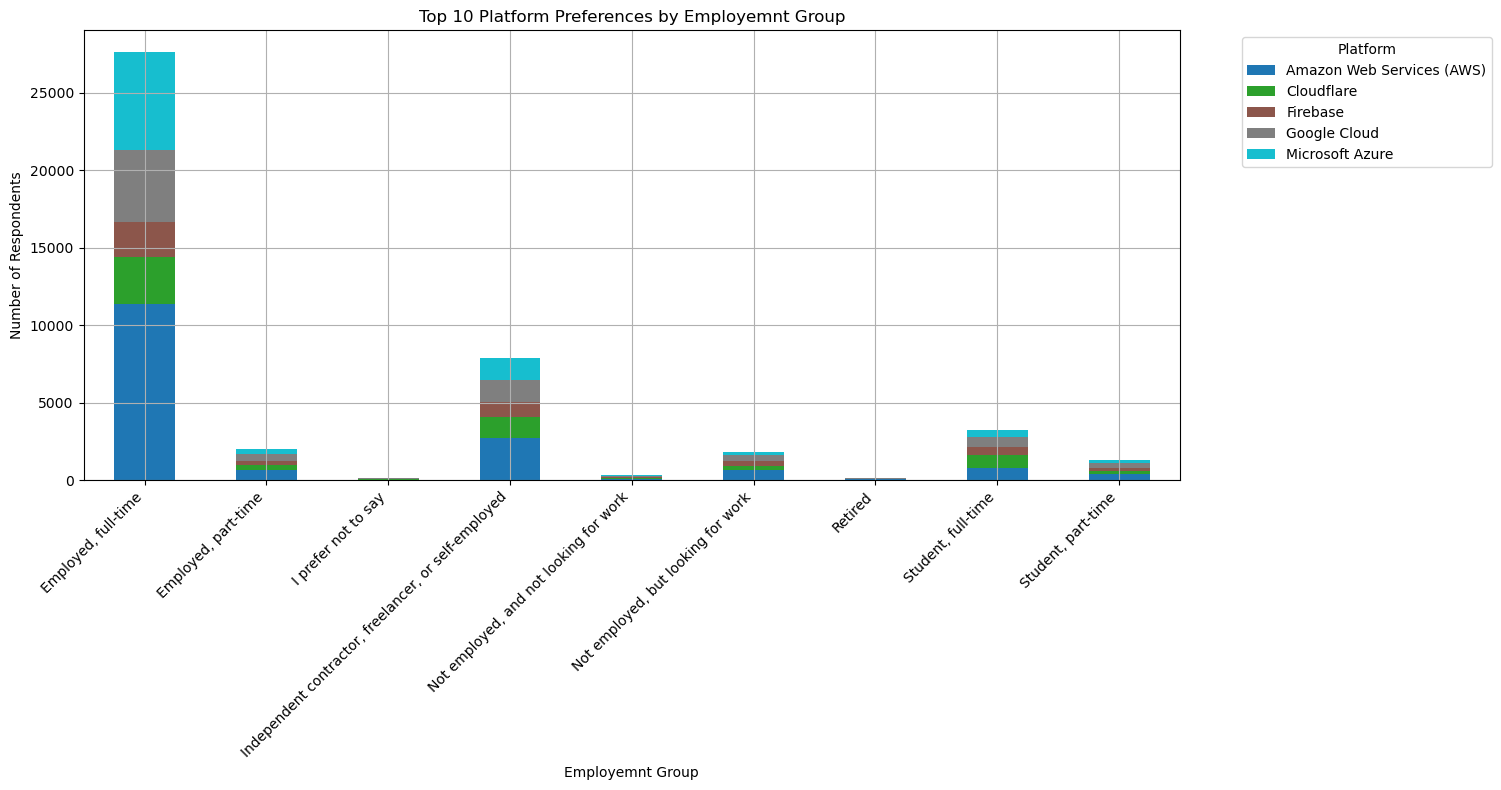

In [162]:
# X = Employemnt type
# Y = admired platforms stacked

import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['Employment', 'PlatformAdmired']).copy()



# Employment: 

# Convert semicolon-separated strings to lists
df_clean['Empl_clean'] = df_clean['Employment'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('Empl_clean').reset_index(drop=True)

# Strip whitespace
df_clean['Empl_clean'] = df_clean['Empl_clean'].str.strip()



# Admired platforms


# Convert semicolon-separated strings to lists
df_clean['PA_clean'] = df_clean['PlatformAdmired'].str.split(';')

# Explode the lists into individual rows and reset index
df_clean = df_clean.explode('PA_clean').reset_index(drop=True)

# Strip whitespace
df_clean['PA_clean'] = df_clean['PA_clean'].str.strip()



# Step 1: Get top 10 most frequent databases
top_PA = df_clean['PA_clean'].value_counts().nlargest(5).index

# Step 2: Filter to include only those top 5
df_top = df_clean[df_clean['PA_clean'].isin(top_PA)]


# Step 3: Group by Empl and PA, count, unstack for plotting
grouped = df_top.groupby(['Empl_clean', 'PA_clean']).size().unstack(fill_value=0)
grouped = grouped.sort_index()


# Plot
grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap='tab10'
)

plt.title('Top 10 Platform Preferences by Employemnt Group')
plt.xlabel('Employemnt Group')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()



### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
